In [1]:
import sys
sys.path.append('../../libs/')
import SIRmodels as mdl
import numpy as np
import matplotlib.pyplot as plt

# For latex use
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)

In [2]:
#Originals values
N = 1000000
SIR0 = np.zeros(3)
SIR0[1] = 100
SIR0[0] = N - np.sum(SIR0[1:2])

In [45]:
t_start = 0 # Initial time
t_end = 80 # Ending time
n_int = 10000 # Number of time steps

# Evaluation time
t_eval = np.linspace(t_start, t_end, n_int) 
# Params
params = [0.5, 0.1] # Beta and Gamma

# Run evaluation
sirEval = mdl.SIR(SIR0, params, t_eval) # Initialize model
sirEval.runEvaluation(norm=True) # Run normalized evaluation 
infected,peakPos = sirEval.getDisease() # Get Infected

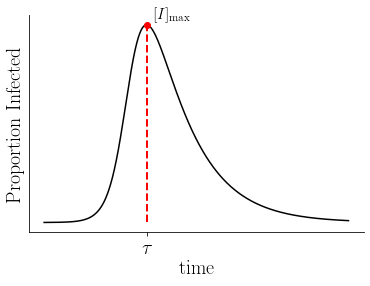

In [47]:
# Plot results: Plot
fig, ax = plt.subplots()
ax.plot(t_eval, infected,'k')
ax.plot(t_eval[peakPos],infected[peakPos],'or')
ax.vlines(t_eval[peakPos],0, infected[peakPos], lw=2, color='r',linestyles='dashed')
ax.set_xticks(t_eval[peakPos])
ax.set_xticklabels([r'$\tau$'], fontsize=20)
ax.set_yticks([]) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(t_eval[peakPos]+2, infected[peakPos]+0.015, r"$[I]_\mathrm{max}$", fontsize=16)
ax.set_xlabel(r'time',fontsize=20)
ax.set_ylabel(r'Proportion Infected',fontsize=20)
plt.savefig('images/modelSIREvalTau.eps')
plt.show()
